In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
df=pd.read_csv("/content/application_record.csv")
df1=pd.read_csv("/content/credit_record.csv")

In [ ]:
df.info()
#
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:

df1.isnull().sum()

,0
ID,0
MONTHS_BALANCE,0
STATUS,0


In [ ]:
df.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [ ]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [ ]:
df1.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [ ]:
df1['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [ ]:
df1['STATUS_1']=df1['STATUS']
df1['STATUS_1'].replace('X',0,inplace=True)
df1['STATUS_1'].replace('C',0,inplace=True)
df1['STATUS_1'].replace('2',1,inplace=True)
df1['STATUS_1'].replace('3',1,inplace=True)
df1['STATUS_1'].replace('4',1,inplace=True)
df1['STATUS_1'].replace('5',1,inplace=True)
df1['STATUS_1']=df1['STATUS_1'].astype(int)


#df1.loc[df1['STATUS_1'] > 1, 'STATUS_1'] = 1

<ipython-input-33-fc65d12881d1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['STATUS_1'].replace('X',0,inplace=True)
<ipython-input-33-fc65d12881d1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
df1['STATUS_1'].unique()

array([0, 1])

In [ ]:
df1.drop(['STATUS'],axis=1,inplace=True)

In [ ]:
df1

,ID,MONTHS_BALANCE,STATUS_1
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


In [ ]:
df.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [ ]:
df["OCCUPATION_TYPE"].fillna(value = 'other', inplace = True)

<ipython-input-38-42c0ee8f0040>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["OCCUPATION_TYPE"].fillna(value = 'other', inplace = True)


In [ ]:
df.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df1.duplicated().sum()

0

In [ ]:
#Merge both datasets

new_df = pd.merge(df, df1, on='ID', how='inner')
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS_1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,1
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [ ]:
new_df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS_1'],
      dtype='object')

In [ ]:
for col in new_df[['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS_1']]:
    print(f"Unique values in column '{col}': {new_df[col].unique()}")

Unique values in column 'ID': [5008804 5008805 5008806 ... 5149838 5150049 5150337]
Unique values in column 'CODE_GENDER': ['M' 'F']
Unique values in column 'FLAG_OWN_CAR': ['Y' 'N']
Unique values in column 'FLAG_OWN_REALTY': ['Y' 'N']
Unique values in column 'CNT_CHILDREN': [ 0  1  3  2  4  5 14 19  7]
Unique values in column 'AMT_INCOME_TOTAL': [ 427500.   112500.   270000.   283500.   135000.   130500.   157500.
  405000.   211500.   360000.   126000.   315000.   247500.   297000.
  225000.   166500.   216000.   255150.   148500.   202500.    94500.
  450000.   180000.    90000.   765000.   382500.   144000.   229500.
  292500.    74250.    40500.   337500.   193500.   267750.   139500.
   67500.   252000.   900000.   115290.   279000.    76500.   234000.
   81000.   108000.    99000.   198000.    45000.   238500.   117000.
  153000.  1350000.   445500.   495000.    85500.   306000.   562500.
  189000.   328500.   310500.   540000.   171000.   675000.   121500.
   72000.    65250.  

In [ ]:
new_df["AGE_YEARS"] = round(-new_df['DAYS_BIRTH']/365,0)    #This column has negative values, so change them into positive and also change the days to years

In [ ]:
new_df["YEARS_EMPLOYED"] = round(new_df['DAYS_EMPLOYED']/365,0)     #CHange days to years
new_df.loc[new_df['YEARS_EMPLOYED']<0, 'YEARS_EMPLOYED'] = 0        #replacing the negative values by 0

In [ ]:
new_df["MONTHS_BALANCE1"] = round(-new_df['MONTHS_BALANCE'],0)      #Change negative to positive

In [ ]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS_1,AGE_YEARS,YEARS_EMPLOYED,MONTHS_BALANCE1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,0,0,33.0,0.0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,-1,0,33.0,0.0,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,-2,0,33.0,0.0,2
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,-3,0,33.0,0.0,3
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,-4,0,33.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-9,0,25.0,0.0,9
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-10,1,25.0,0.0,10
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-11,1,25.0,0.0,11
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-12,0,25.0,0.0,12


In [ ]:
new_df.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'MONTHS_BALANCE', 'FLAG_MOBIL'], axis = 1, inplace = True)

In [ ]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS_1,AGE_YEARS,YEARS_EMPLOYED,MONTHS_BALANCE1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,other,2.0,0,33.0,0.0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,other,2.0,0,33.0,0.0,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,other,2.0,0,33.0,0.0,2
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,other,2.0,0,33.0,0.0,3
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,other,2.0,0,33.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,0,25.0,0.0,9
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,1,25.0,0.0,10
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,1,25.0,0.0,11
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,0,25.0,0.0,12


In [ ]:
num = new_df.select_dtypes(include=['number']).columns
num

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'STATUS_1', 'AGE_YEARS',
       'YEARS_EMPLOYED', 'MONTHS_BALANCE1'],
      dtype='object')

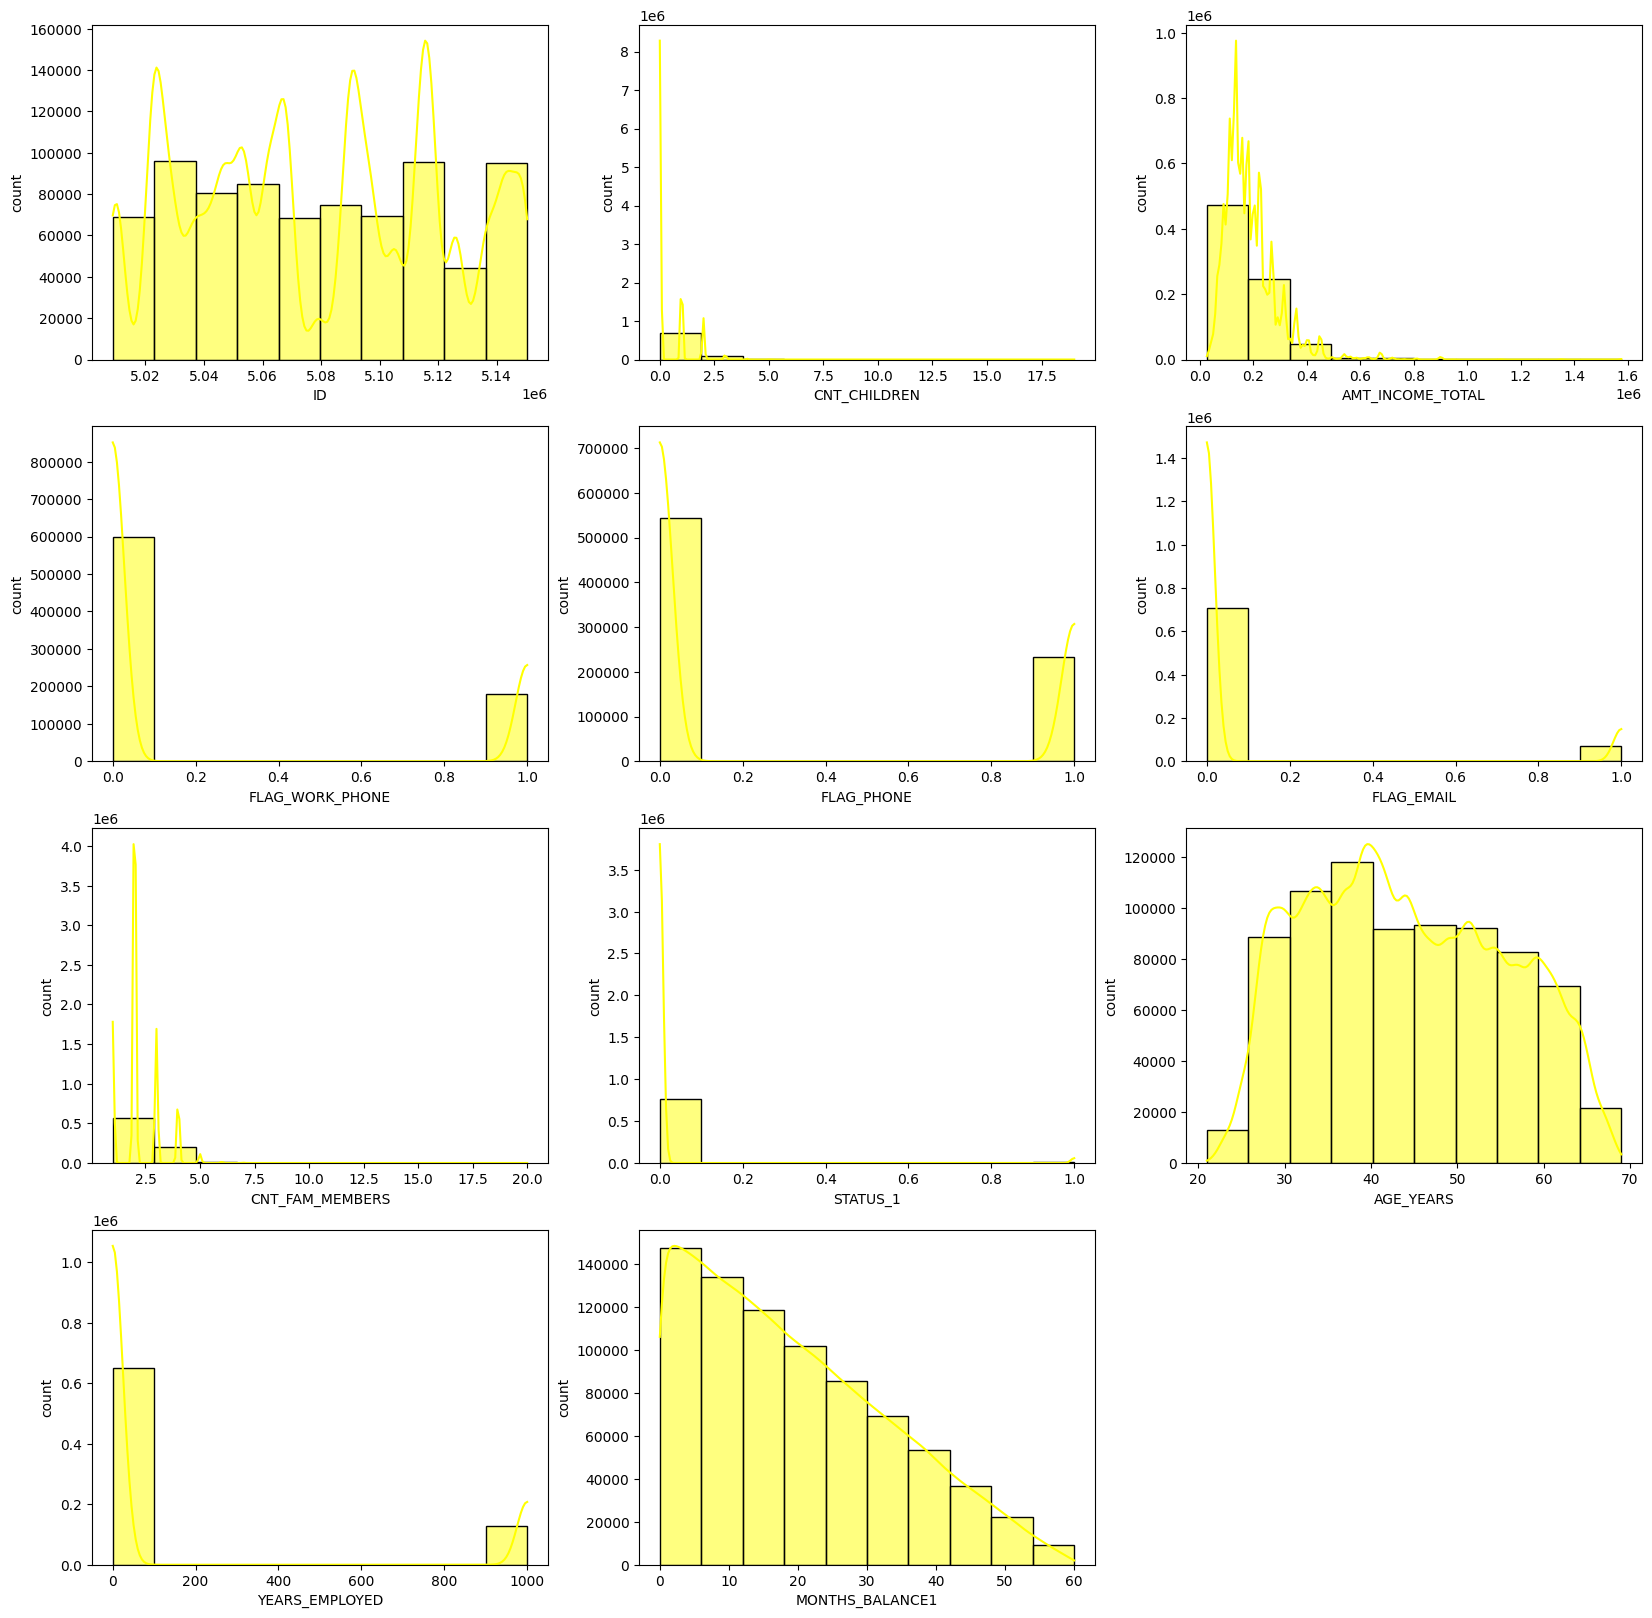

In [ ]:
plt.figure(figsize = (20,20))
for i, col in enumerate(num,1):
  plt.subplot(4,3,i)
  sns.histplot(data = new_df, kde = True, x = col, bins = 10,color = '#ffff00')
  plt.xlabel(col)
  plt.ylabel('count')

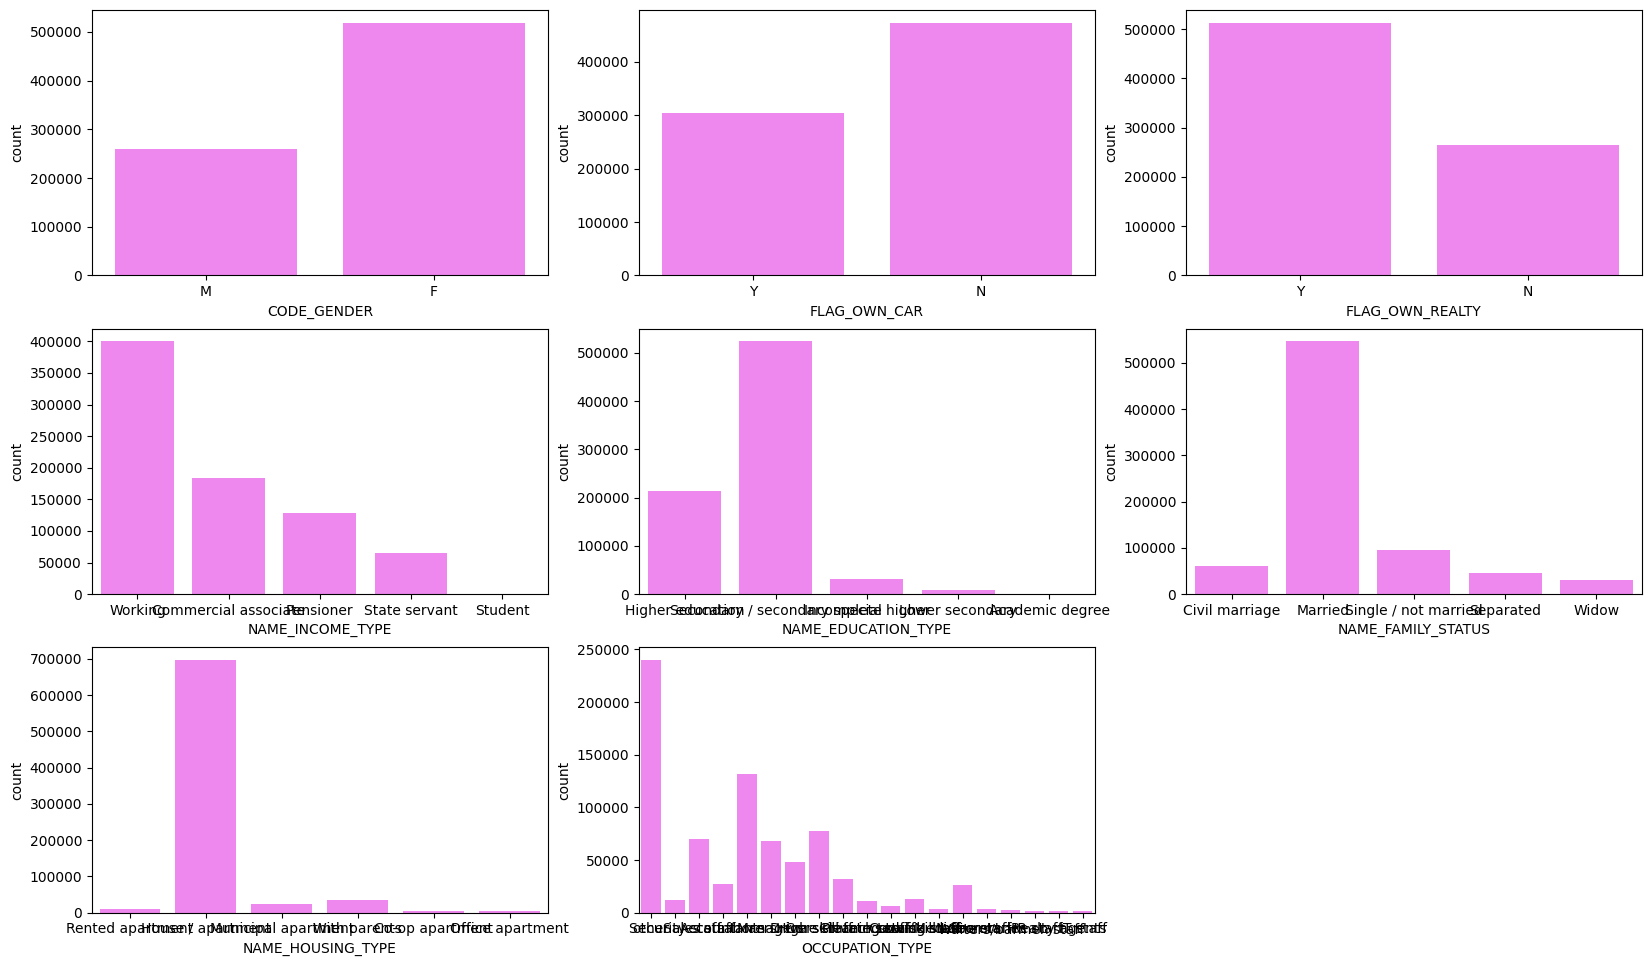

In [ ]:
cat_col = new_df.select_dtypes(include=['object']).columns  #taking all the values which has oject to cat_col
plt.figure(figsize=(20,20))
for i, col in enumerate(cat_col,1): # here for plot the index starts with 1 so we are assigning age column to 1
  plt.subplot(5,3,i)
  sns.countplot(data=new_df,x=col,color="#ff77ff")
  plt.xlabel(col)
  plt.ylabel("count")

<Axes: xlabel='STATUS_1', ylabel='count'>

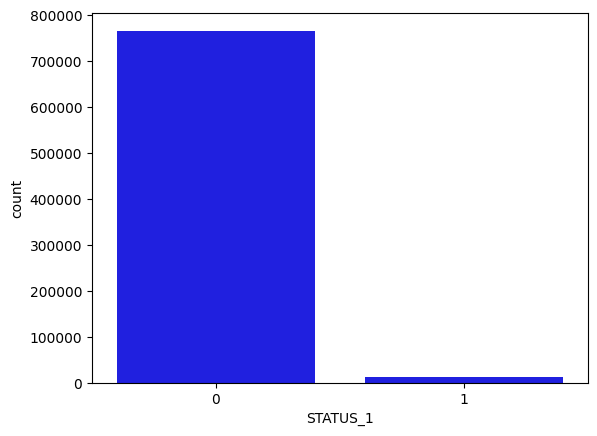

In [ ]:
sns.countplot(data=new_df,x="STATUS_1",color="blue")

In [ ]:
num = new_df.select_dtypes(include=['number']).columns
num

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'STATUS_1', 'AGE_YEARS',
       'YEARS_EMPLOYED', 'MONTHS_BALANCE1'],
      dtype='object')

<Axes: >

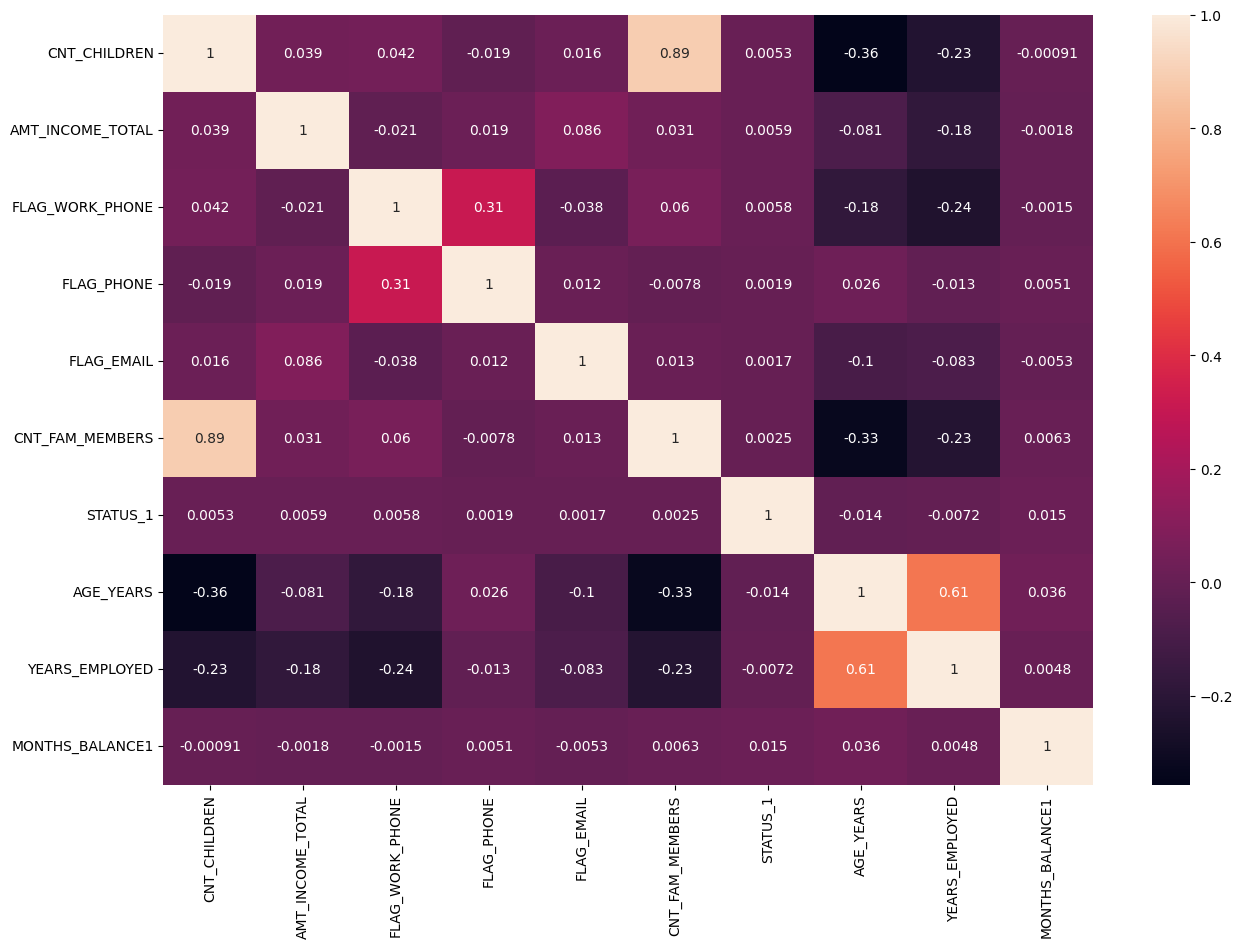

In [ ]:
num_col = new_df[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'STATUS_1', 'AGE_YEARS',
       'YEARS_EMPLOYED', 'MONTHS_BALANCE1']]
plt.figure(figsize= (15,10))
sns.heatmap(num_col.corr(), annot = True)

In [ ]:
new_df.drop(['CNT_CHILDREN'], axis = 1, inplace = True)

In [ ]:
#converting the catergorical column to numerical
for col in new_df.select_dtypes(include=['object']).columns:
  label_encoder=preprocessing.LabelEncoder()
  label_encoder.fit(new_df[col].unique())
  new_df[col]=label_encoder.transform(new_df[col])

In [ ]:
#split the data into training and testing sets
x=new_df.drop('STATUS_1',axis=1)   #independent columns
y=new_df['STATUS_1']               #charges dependent

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)   #mention any one size train or test
x_train,x_test,y_train,y_test

(             ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  \
 566880  5112977            0             1                0          157500.0   
 147360  5078891            0             1                1          148500.0   
 481354  5093227            1             0                1          157500.0   
 392502  5069057            1             1                0          225000.0   
 671336  5132767            0             0                1          202500.0   
 ...         ...          ...           ...              ...               ...   
 259178  5052670            0             1                0          247500.0   
 365838  5067457            0             0                0          121500.0   
 131932  5029314            0             0                0          225000.0   
 671155  5132736            1             0                1           81000.0   
 121958  5028779            0             0                1          135000.0   
 
         NAME_

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#train the linear regression model

model= LogisticRegression()# meantion which type of algorithm we use
model.fit(x_train,y_train)#training the algorithms


LogisticRegression()

In [ ]:
model.score(x_train,y_train)##training performnace

0.9850684376667546

In [ ]:
y_pred1=model.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test,y_pred1)
conf_matrix = confusion_matrix(y_test,y_pred1)
classification_reg = classification_report(y_test,y_pred1)
print("Accuracy:", accuracy)
print("Confusion Matrix:", conf_matrix)
print("Classification Regression:", classification_reg)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
kappa_score = cohen_kappa_score(y_test,y_pred1)
print("Cohen Kappa Score:", kappa_score)   #kappa_score is only for classification models

Accuracy: 0.9853095285548048
Confusion Matrix: [[153258      0]
 [  2285      0]]
Classification Regression:               precision    recall  f1-score   support

           0       0.99      1.00      0.99    153258
           1       0.00      0.00      0.00      2285

    accuracy                           0.99    155543
   macro avg       0.49      0.50      0.50    155543
weighted avg       0.97      0.99      0.98    155543

Cohen Kappa Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Random **Forest**

In [ ]:
#using Random Forest

from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred2=model2.predict(x_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test,y_pred2)
conf_matrix = confusion_matrix(y_test,y_pred2)
classification_reg = classification_report(y_test,y_pred2)
print("Accuracy:", accuracy)
print("Confusion Matrix:", conf_matrix)
print("Classification Regression:", classification_reg)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
kappa_score = cohen_kappa_score(y_test,y_pred2)
print("Cohen Kappa Score:", kappa_score)   #kappa_score is only for classification models

Accuracy: 0.9866917829796262
Confusion Matrix: [[152578    680]
 [  1390    895]]
Classification Regression:               precision    recall  f1-score   support

           0       0.99      1.00      0.99    153258
           1       0.57      0.39      0.46      2285

    accuracy                           0.99    155543
   macro avg       0.78      0.69      0.73    155543
weighted avg       0.98      0.99      0.99    155543

Cohen Kappa Score: 0.4572235827473726


# **Decision Tree**

In [ ]:
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred3=model3.predict(x_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test,y_pred3)
conf_matrix = confusion_matrix(y_test,y_pred3)
classification_reg = classification_report(y_test,y_pred3)
print("Accuracy:", accuracy)
print("Confusion Matrix:", conf_matrix)
print("Classification Regression:", classification_reg)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
kappa_score = cohen_kappa_score(y_test,y_pred3)
print("Cohen Kappa Score:", kappa_score)   #kappa_score is only for classification models

Accuracy: 0.9829886269391743
Confusion Matrix: [[151877   1381]
 [  1265   1020]]
Classification Regression:               precision    recall  f1-score   support

           0       0.99      0.99      0.99    153258
           1       0.42      0.45      0.44      2285

    accuracy                           0.98    155543
   macro avg       0.71      0.72      0.71    155543
weighted avg       0.98      0.98      0.98    155543

Cohen Kappa Score: 0.42670891113695397


## **USING SMOTE TECHNIQUE**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import train_test_split

# Applying SMOTE
smote = SMOTE()
x1, y1 = smote.fit_resample(x, y)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Training Logistic Regression Model
model4 = LogisticRegression()
model4.fit(x_train1, y_train1)

# Model Evaluation
y_pred4 = model4.predict(x_test1)


accuracy = accuracy_score(y_test1, y_pred4)
conf_matrix = confusion_matrix(y_test1, y_pred4)
classification_reg = classification_report(y_test1, y_pred4)
kappa_score = cohen_kappa_score(y_test1, y_pred4)

print("Accuracy: ", accuracy)
print("Confusion Matrix: ", conf_matrix)
print("Classification Regression: ", classification_reg)
print("Cohen Kappa Score:", kappa_score)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.5302849348683009
Confusion Matrix:  [[80480 72434]
 [71513 82029]]
Classification Regression:                precision    recall  f1-score   support

           0       0.53      0.53      0.53    152914
           1       0.53      0.53      0.53    153542

    accuracy                           0.53    306456
   macro avg       0.53      0.53      0.53    306456
weighted avg       0.53      0.53      0.53    306456

Cohen Kappa Score: 0.060554353299762775


# **Smote in  Decision Tree Classifier**

In [ ]:
#Smote in  Decision Tree Classifier


model5 = DecisionTreeClassifier()
model5.fit(x_train1, y_train1)
#Model Evaluation
y_pred5 = model5.predict(x_test1)


accuracy = accuracy_score(y_test1, y_pred5)
conf_matrix = confusion_matrix(y_test1, y_pred5)
classification_reg = classification_report(y_test1, y_pred5)
kappa_score = cohen_kappa_score(y_test1,y_pred5)

print("Accuracy: ", accuracy)
print("Confusion Matrix: ", conf_matrix)
print("Classification Regression: ", classification_reg)
print("Cohen Kappa Score:", kappa_score)

Accuracy:  0.972756284752134
Confusion Matrix:  [[147571   5343]
 [  3006 150536]]
Classification Regression:                precision    recall  f1-score   support

           0       0.98      0.97      0.97    152914
           1       0.97      0.98      0.97    153542

    accuracy                           0.97    306456
   macro avg       0.97      0.97      0.97    306456
weighted avg       0.97      0.97      0.97    306456

Cohen Kappa Score: 0.9455106376478928


# **Smote in  Random Forest Classifier**

In [ ]:
#Smote in  Random Forest Classifier


model6 = RandomForestClassifier()
model6.fit(x_train1, y_train1)
#Model Evaluation
y_pred6 = model6.predict(x_test1)


accuracy = accuracy_score(y_test1, y_pred6)
conf_matrix = confusion_matrix(y_test1, y_pred6)
classification_reg = classification_report(y_test1, y_pred6)
kappa_score = cohen_kappa_score(y_test1,y_pred6)

print("Accuracy: ", accuracy)
print("Confusion Matrix: ", conf_matrix)
print("Classification Regression: ", classification_reg)
print("Cohen Kappa Score:", kappa_score)

Accuracy:  0.9769200146187381
Confusion Matrix:  [[147730   5184]
 [  1889 151653]]
Classification Regression:                precision    recall  f1-score   support

           0       0.99      0.97      0.98    152914
           1       0.97      0.99      0.98    153542

    accuracy                           0.98    306456
   macro avg       0.98      0.98      0.98    306456
weighted avg       0.98      0.98      0.98    306456

Cohen Kappa Score: 0.9538378011781462


# **GradientBoostingClassifier with smote**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit

from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_model=GradientBoostingClassifier()
gradient_boosting_model.fit(x_train1,y_train1)

gradient_predictions=gradient_boosting_model.predict(x_test1)

accuracy = accuracy_score(y_test1, gradient_predictions)
conf_matrix =confusion_matrix(y_test1, gradient_predictions)
classification_reg = classification_report(y_test1, gradient_predictions)
kappa_score = cohen_kappa_score(y_test1, gradient_predictions)

print("accuracy: ", accuracy)
print("confusion matrix: ", conf_matrix)
print("classification regression", classification_reg)
print('kappa score', kappa_score)#only for classification problem

accuracy:  0.6906505338449892
confusion matrix:  [[113983  38931]
 [ 55871  97671]]
classification regression               precision    recall  f1-score   support

           0       0.67      0.75      0.71    152914
           1       0.72      0.64      0.67    153542

    accuracy                           0.69    306456
   macro avg       0.69      0.69      0.69    306456
weighted avg       0.69      0.69      0.69    306456

kappa score 0.38143860609041913


# **Decision Tree With Smote**

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import train_test_split

# Assuming x_train, x_test, y_train, y_test are already defined
bbc = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)  # In estimator we can also give RandomForestClassifier()
bbc.fit(x_train, y_train)
y_pred_d = bbc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_d)
conf_matrix = confusion_matrix(y_test, y_pred_d)
classification_reg = classification_report(y_test, y_pred_d)
kappa_score = cohen_kappa_score(y_test, y_pred_d)

print("Accuracy: ", accuracy)
print("Confusion Matrix: ", conf_matrix)
print("Classification Regression: ", classification_reg)
print("Cohen Kappa Score:", kappa_score)


Accuracy:  0.8990889978976875
Confusion Matrix:  [[138134  15124]
 [   572   1713]]
Classification Regression:                precision    recall  f1-score   support

           0       1.00      0.90      0.95    153258
           1       0.10      0.75      0.18      2285

    accuracy                           0.90    155543
   macro avg       0.55      0.83      0.56    155543
weighted avg       0.98      0.90      0.93    155543

Cohen Kappa Score: 0.15736639280156983
